# Exercise 1

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

In [10]:
iris = datasets.load_iris()
print("Iris Data\n",list(iris.keys()))

Iris Data
 ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']


In [11]:
X = iris.data[:, :2] # we only take the first two features.

In [12]:
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [13]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [14]:
# Split into a train and test partition.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
log_reg = LogisticRegression()

In [17]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [18]:
print("Predict (train):", log_reg.predict(X_train[:len(y_train), :]))
print("Predict (test):", log_reg.predict(X_test[:len(y_test), :]))

Predict (train): [1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1
 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0
 0 1 0 0 0 1 0 1 0]
Predict (test): [0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [19]:
print(f"The training accuracy is {round(100 * log_reg.score(X_train, y_train), 4)} %")

The training accuracy is 83.3333 %


In [20]:
print(f"The test accuracy is {round(100 *log_reg.score(X_test, y_test), 4)} %")

The test accuracy is 70.0 %


# Exercise 2

In [21]:
import matplotlib.pyplot as plt

In [22]:
X_bias = np.insert(X, 0, 1, axis=1) # Add bias to design matrix

In [23]:
# Split into a train and test partition.
X_train, X_test, y_train, y_test = train_test_split(X_bias, y, test_size=0.2, random_state=0)

In [24]:
# Function to print Training and Test accuracy
def accuracy(X_train, X_test, y_train, y_test, w):
    right_pred = 0
    for i in range(0, len(X_train)):
        if np.dot(X_train[i], w)[0] >= 0.5 and y_train[i] == 1:
            right_pred = right_pred + 1
        elif np.dot(X_train[i], w)[0] < 0.5 and y_train[i] == 0:
            right_pred = right_pred + 1

    print(f"The training accuracy is {round(100 * right_pred / len(y_train), 4)} %")

    right_pred = 0
    for i in range(0, len(X_test)):
        if np.dot(X_test[i], w)[0] >= 0.5 and y_test[i] == 1:
            right_pred = right_pred + 1
        elif np.dot(X_test[i], w)[0] < 0.5 and y_test[i] == 0:
            right_pred = right_pred + 1

    print(f"The test accuracy is {round(100 * right_pred / len(y_test), 4)} %")

### i) Squared error and Linear unit (Linear Regression)

In [25]:
def mean_squared_error(X, y, w):
    MSE = 0
    for i in range(len(X)):
        MSE = MSE + (y[i] - np.dot(X[i], w))**2
        
    MSE = MSE[0] / len(X)
    
    return MSE

In [26]:
# Stochastic gradient descent

n = 0.03 # learning rate (best possible from trial and eror)
epochs = 1000 # number of epochs
w = np.ones(shape=(X_train.shape[1], 1)) * np.random.random() # random weight initialization

A = [mean_squared_error(X_train, y_train, w)] # vector with error

for j in range(0, epochs): # going through each epoch
    
    for i in range(0, len(X_train)): # going through all examples
        net = np.dot(X_train[i], w)[0]
        delta_w = n * 1/len(X_train) * (y_train[i] - net) * X_train[i] # update
        w = w + delta_w.reshape((len(w), 1))
        
    A.append(mean_squared_error(X_train, y_train, w))

accuracy(X_train, X_test, y_train, y_test, w)

The training accuracy is 74.1667 %
The test accuracy is 66.6667 %


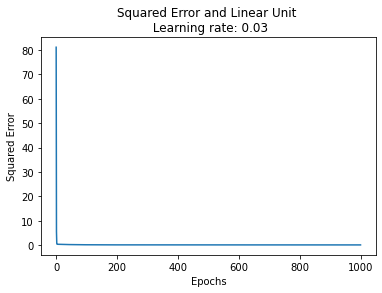

In [27]:
plt.plot(A)
plt.title(f"Squared Error and Linear Unit \n Learning rate: {n}")
plt.xlabel('Epochs')
plt.ylabel('Squared Error')
plt.show()

### ii) Squared error and Sigmoid unit 

In [23]:
def sigmoid(net):
    return 1 / (1 + np.e**(-2*net))

In [24]:
def mean_squared_error_sigmoid(X, y, w):
    MSE = 0
    for i in range(len(X)):
        MSE = MSE + (y[i] - sigmoid(np.dot(X[i], w)))**2
        
    MSE = MSE[0] / len(X)
    
    return MSE

In [25]:
n = 0.001 # learning rate (best possible from trial and eror)
epochs = 10000
w = np.ones(shape=(X_bias.shape[1], 1)) * np.random.random() # random weight initialization

A = [mean_squared_error_sigmoid(X_train, y_train, w)] # vector with error

# loop through all the train set
for j in range(0, epochs):
    for i in range(0, len(X_train)):
        net = np.dot(X_train[i], w)
        net = sigmoid(net)

        delta_w = n * (y_train[i] - net) * X_train[i]
        w = w + delta_w.reshape((len(w), 1))
    A.append(mean_squared_error_sigmoid(X_train, y_train, w))

accuracy(X_train, X_test, y_train, y_test, w)

The training accuracy is 75.8333 %
The test accuracy is 80.0 %


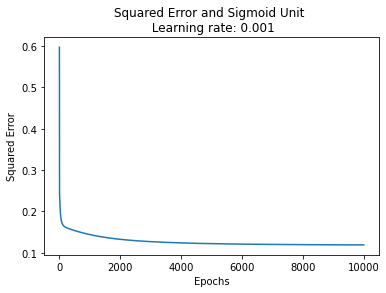

In [26]:
plt.plot(A)
plt.title(f"Squared Error and Sigmoid Unit \n Learning rate: {n}")
plt.xlabel('Epochs')
plt.ylabel('Squared Error')
plt.show()

### iii) Cross-Entropy and sigmoid unit (Logistic Regression)

In [27]:
def sigmoid(net):
    return np.e**net / (1 + np.e**(net))

In [28]:
def cross_entropy_error(X, y, w):
    A = 0
    for i in range(0, len(X)):
        o = sigmoid(np.dot(X[i], w)[0])
        A = A + y[i] * np.log(o) + (1 - y[i]) * np.log(1 - o)
    return (- A)

In [29]:
n = 0.001 # learning rate (best possible from trial and eror)
epochs = 10000
w = np.ones(shape=(X_bias.shape[1], 1)) * np.random.random() # random weight initialization

A = [cross_entropy_error(X_train, y_train, w)] # vector with error

# loop through all the train set
for j in range(0, epochs):
    for i in range(0, len(X_train)):
        net = np.dot(X_train[i], w)[0]
        net = sigmoid(net)

        delta_w = n * (y_train[i] - net) * X_train[i]
        w = w + delta_w.reshape((len(w), 1))
    A.append(cross_entropy_error(X_train, y_train, w))

accuracy(X_train, X_test, y_train, y_test, w)

The training accuracy is 76.6667 %
The test accuracy is 73.3333 %


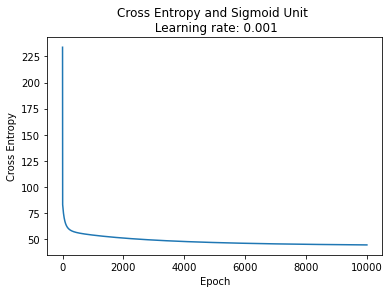

In [30]:
# Plot 
plt.plot(A)
plt.title(f"Cross Entropy and Sigmoid Unit \n Learning rate: {n}")
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.show()